# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Importing Dataset

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualizing the data

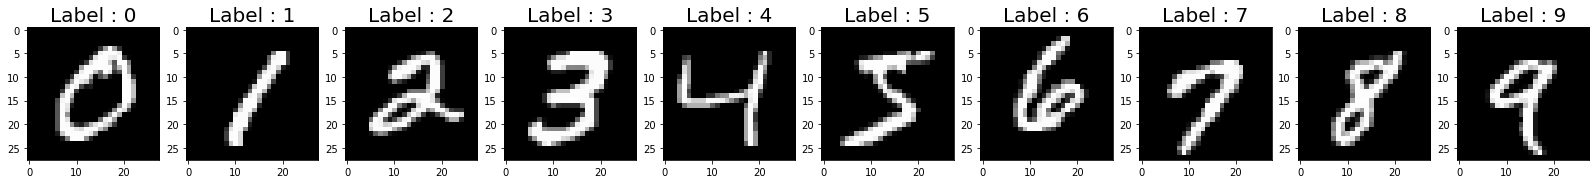

In [4]:
# Visualizing the data
num_classes= 10
f , ax = plt.subplots(1, num_classes, figsize=(28,28))

for i in range (0, num_classes):
    sample = x_train[ y_train == i][0]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title("Label : {}".format(i), fontsize = 20)

In [5]:
# Visualizing the labels
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [6]:
# Converting the labels in a better format
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Data Preparation

### Data Normalization

In [8]:
# We need to normalize the data so we take all the values from 0 to 255 and we
# normalize them between 0 and 1 dividing by 255. This will make help a lot 
# with our calculations later.

x_train = x_train / 255.0
x_test = x_test / 255.0

### Data Reshaping

In [9]:
#lets see the data shape as it is
x_train[0].shape

(28, 28)

In [10]:
# We will flatten the data from (28,28) to (748,)

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Create the Model (Fully Connected NN)

In [11]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Training the Model

In [12]:
batch_size = 512
epochs = 15
model.fit(x = x_train, y= y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/15
118/118 [==============================] - 1s 5ms/step - loss: 0.6059 - accuracy: 0.8240
Epoch 2/15
118/118 [==============================] - 1s 4ms/step - loss: 0.2305 - accuracy: 0.9339
Epoch 3/15
118/118 [==============================] - 0s 4ms/step - loss: 0.1695 - accuracy: 0.9510
Epoch 4/15
118/118 [==============================] - 0s 4ms/step - loss: 0.1328 - accuracy: 0.9610
Epoch 5/15
118/118 [==============================] - 0s 4ms/step - loss: 0.1123 - accuracy: 0.9671
Epoch 6/15
118/118 [==============================] - 0s 4ms/step - loss: 0.0951 - accuracy: 0.9717
Epoch 7/15
118/118 [==============================] - 0s 4ms/step - loss: 0.0819 - accuracy: 0.9753
Epoch 8/15
118/118 [==============================] - 1s 4ms/step - loss: 0.0721 - accuracy: 0.9781
Epoch 9/15
118/118 [==============================] - 1s 4ms/step - loss: 0.0630 - accuracy: 0.9809
Epoch 10/15
118/118 [==============================] - 1s 4ms/step - loss: 0.0551 - accuracy: 0.9834

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 483us/step - loss: 0.0693 - accuracy: 0.9802
Test Loss: 0.06927663832902908, Test Accuracy: 0.9801999926567078


[[1.4581440e-06 1.2024045e-05 4.4784992e-06 ... 9.9981374e-01
  5.5877447e-08 1.4971031e-05]
 [4.0991984e-11 4.2627260e-08 9.9999988e-01 ... 1.1700843e-11
  1.2090716e-09 1.9700653e-14]
 [2.4170376e-06 9.9885643e-01 9.5059353e-05 ... 2.1324812e-04
  5.9193512e-04 2.6492271e-06]
 ...
 [1.0772983e-11 1.3080297e-10 8.9209774e-14 ... 5.9624028e-08
  9.5503894e-10 8.0229501e-07]
 [1.4444991e-09 1.7801928e-10 8.3806345e-10 ... 4.1317133e-10
  1.7160743e-07 1.3457780e-11]
 [5.6794791e-09 1.1626852e-11 6.2003080e-10 ... 1.1032738e-15
  1.4806646e-10 8.1801335e-13]]
[7 2 1 ... 4 5 6]


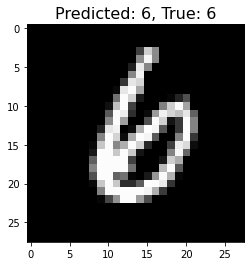

In [38]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

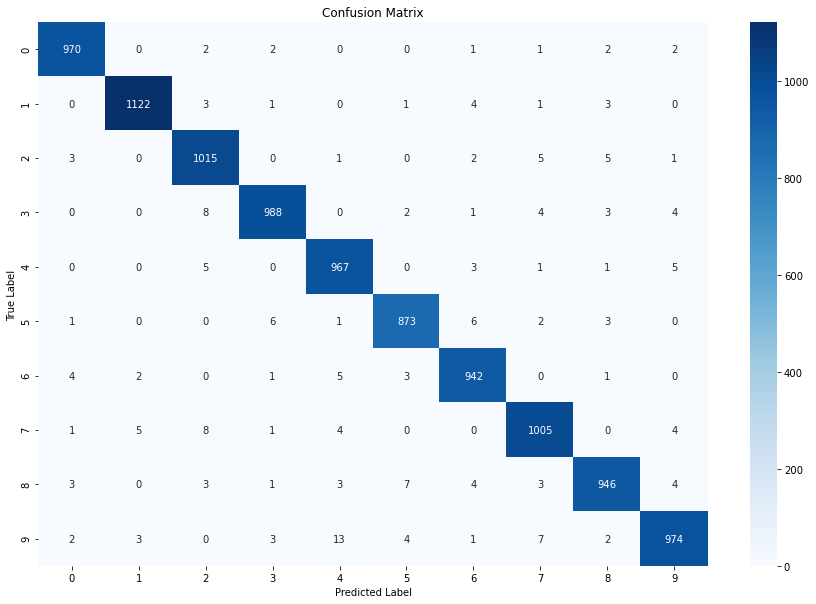

In [21]:

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');
